# Prepare Data


What is it? 
- the stage after acquiring our data that ensures our data is ready for exploration and eventually modeling

- Pipeline: Plan - Acquire - **Prepare** - Explore - Model - Deliver


Why do we care?
- because we need our data to be tidy and clean for accurate exploration
- because we need our data split to be able to adaquately evaluate our model 


How do we do it?
- start with one dataframe from acquire
1. summarize the data
2. clean the data
3. split the data: train, validate, and test
- end with `prepare.py` file

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import acquire
import os

## This Lesson - Titanic Dataset

Project goal: predict who survived the titanic

## Acquire 

- use my `acquire.py` since i've already established this step

In [6]:
# get titanic data
df = acquire.get_titanic_data()

csv file found and loaded


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


In [8]:
#look at data
df.describe(include='all')

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
count,891.000000,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,203,889,891.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,7,3,NaN
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,C,Southampton,NaN
freq,NaN,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,59,644,NaN
mean,445.000000,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,0.602694
std,257.353842,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,0.489615
min,0.000000,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000
25%,222.500000,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,0.000000
50%,445.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,1.000000
75%,667.500000,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,1.000000


In [9]:
df.shape

(891, 13)

## Prepare

## STEP 1: Summarize

- understand your data
- visualize your variables (univariate only)

#### understand your data

In [10]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.5+ KB


Do we know what all the columns mean? 
- passenger_id: this the unique id of a passenger
- survived: this is whether or not somewhere survived
- pclass: 
- sex: 
- age:
- sibsp:
- parch:
- fare: 
- embarked:
- class:
- deck:
- embarked_town:
- alone:

What does one row of data respresent? 
- ?

What is our target variable? 
- ?

In [11]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### visualize your data (univariate)

In [12]:
#find numeric columns
num_col = df.select_dtypes(include='number').columns
num_col

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

passenger_id


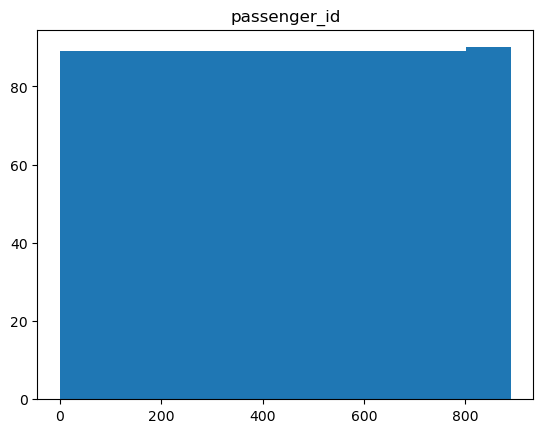

survived


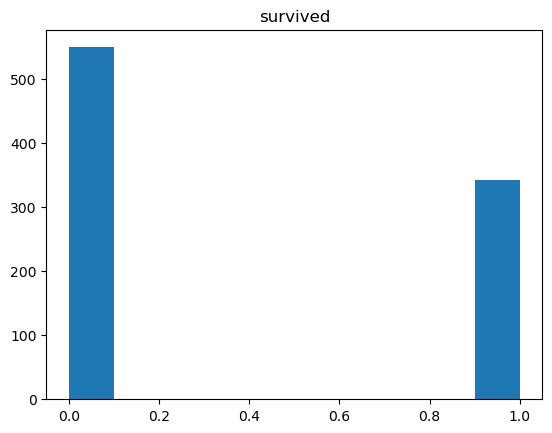

pclass


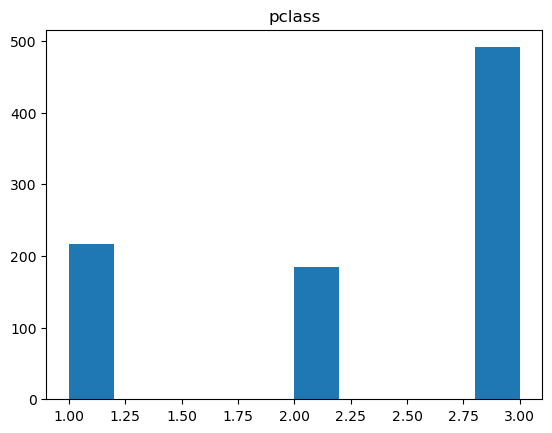

age


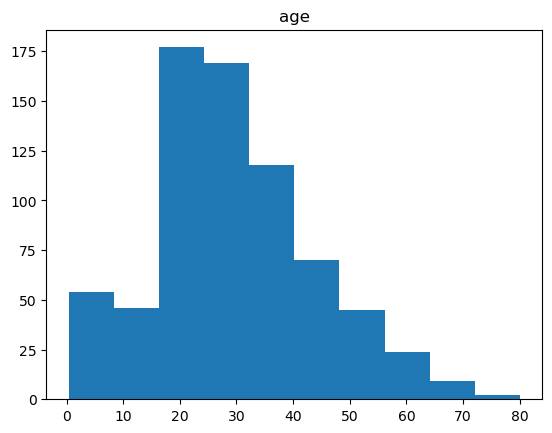

sibsp


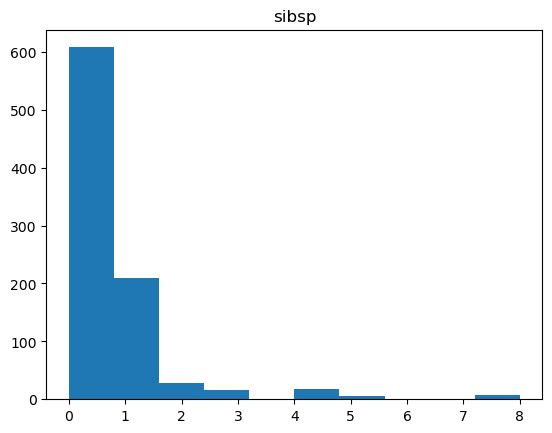

parch


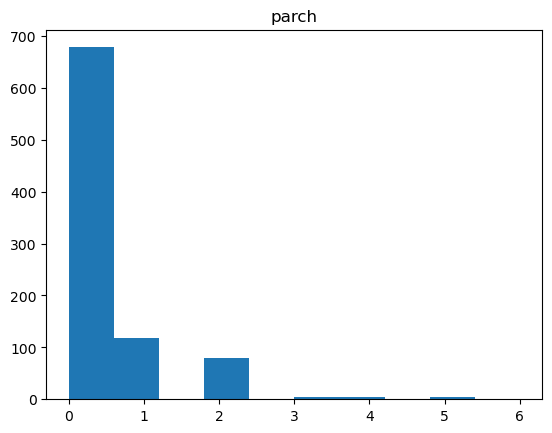

fare


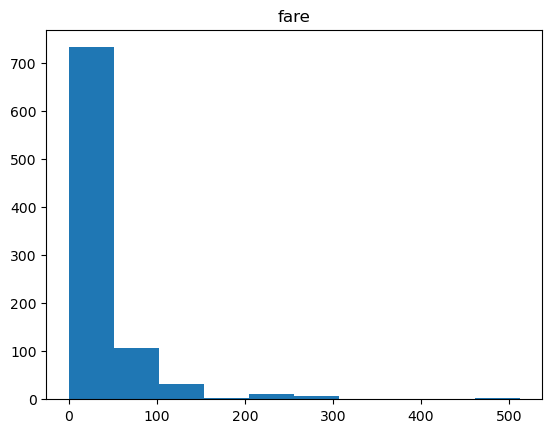

alone


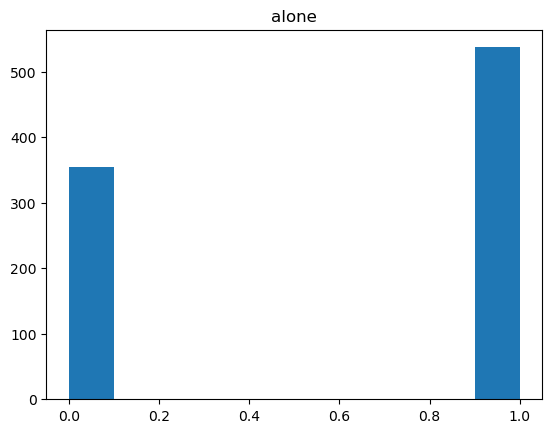

In [13]:
#plot distributions of numeric columns
for col in num_col:
    print(col)
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [14]:
#get string columns
str_col = df.columns [df.dtypes == 'objects']
str_col

Index([], dtype='object')

# 

In [15]:
#plot distributions of string columns
for col in str_col:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalized=True))
    df[col].value_counts(dropna=False).sort_index().plot.bar() # you can add .sort.index to sort the data
    plt.show()
    print()
    

# STEP 2: Clean the data

- take care of duplicates
- verify datatypes
- handle nulls
- consider outliers
- for modeling: make all columns numeric

Note: there are other things to consider in the prepare phase that we will talk about in future methodologies

### Duplicate Data

In [16]:
#look at data
df.head()


,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


#### are there any duplicates in passenger_id?

In [17]:
df.passenger_id.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: passenger_id, Length: 891, dtype: bool

In [18]:
df.passenger_id.duplicated().sum()

0

In [19]:
df [df.passenger_id.duplicated()]

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone


#### embarked and embark_town columns

In [20]:
#view counts across both
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [21]:
df.embark_town.value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [22]:
pd.crosstab(df.embark_town, df.embarked)

embarked,C,Q,S
embark_town,,,
Cherbourg,168,0,0
Queenstown,0,77,0
Southampton,0,0,644


In [23]:
#drop unnecessary column
df = df.drop(columns='embark_town')
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,1


In [24]:
#verify
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,1


#### pclass and class columns

In [25]:
#view counts across both
pd.crosstab(df.pclass, df['class']) # the class was set a string therefor it needed to be bracket

class,First,Second,Third
pclass,,,
1,216,0,0
2,0,184,0
3,0,0,491


In [26]:
df = df.drop(columns='class') # it better to drop "class" because pclass is already an int. 
df

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,NaN,1
887,887,1,1,female,19.0,0,0,30.0000,S,B,1
888,888,0,3,female,NaN,1,2,23.4500,S,NaN,0
889,889,1,1,male,26.0,0,0,30.0000,C,C,1


In [27]:
df.sample(10)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
763,763,1,1,female,36.0,1,2,120.0000,S,B,0
87,87,0,3,male,NaN,0,0,8.0500,S,NaN,1
30,30,0,1,male,40.0,0,0,27.7208,C,NaN,1
530,530,1,2,female,2.0,1,1,26.0000,S,NaN,0
845,845,0,3,male,42.0,0,0,7.5500,S,NaN,1
655,655,0,2,male,24.0,2,0,73.5000,S,NaN,0
226,226,1,2,male,19.0,0,0,10.5000,S,NaN,1
746,746,0,3,male,16.0,1,1,20.2500,S,NaN,0
2,2,1,3,female,26.0,0,0,7.9250,S,NaN,1
753,753,0,3,male,23.0,0,0,7.8958,S,NaN,1


In [28]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,NaN,1


**Note:** The machine learning models can only accept numeric values. Therefore, we will remove the class column instead the pclass column.

In [29]:
#drop unnecessary column
pd.crosstab(df.sibsp, df.alone) #checking into another columns that could be dropped

alone,0,1
sibsp,,
0,71,537
1,209,0
2,28,0
3,16,0
4,18,0
5,5,0
8,7,0


### Verify Datatypes

In [30]:
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
deck             object
alone             int64
dtype: object

In [31]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,NaN,0
1,1,1,1,female,38.0,1,0,71.2833,C,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,NaN,1
3,3,1,1,female,35.0,1,0,53.1000,S,C,0
4,4,0,3,male,35.0,0,0,8.0500,S,NaN,1


### Handle Nulls

some options
- delete all nulls rows
- delete that column
- fill with a median value (numeric columns) 
- fill with the mode (string columns)
- fill with with 0

Note: not all these answers will make sense for your column!!

In [32]:
#find were null values are
# df.isnull() # if there is a null it will show as TRUE
df.isnull().sum() # This will count all the nulls by column

passenger_id      0
survived          0
pclass            0
sex               0
age             177
sibsp             0
parch             0
fare              0
embarked          2
deck            688
alone             0
dtype: int64

In [33]:
#isolate nulls values
df.isnull().sum()[df.isnull().sum() > 0] # this will count and narrow the sum

age         177
embarked      2
deck        688
dtype: int64

In [34]:
df.shape

(891, 11)

#### age

In [35]:
#check counts
df.age.value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64

In [36]:
#check percentage
df.age.isnull().mean()

0.19865319865319866

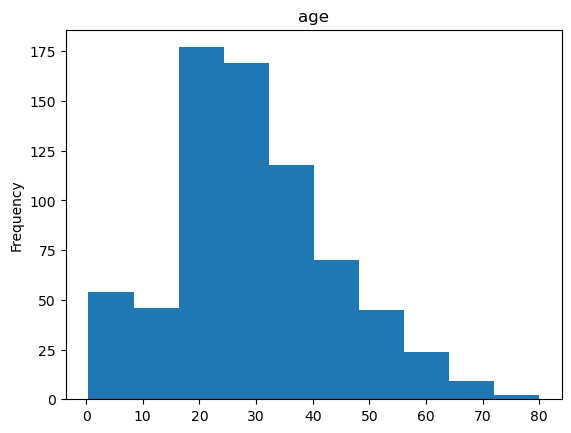

In [37]:
#plot it
df.age.plot.hist()
plt.title('age')
plt.show()

- there doesnt seem like an appropriate value to replace
- we will delete the entire column, for now
- with more time, i might come back and see if there is a way to keep the age column 

In [38]:
#drop
df = df.drop(columns='age')

In [39]:
#verify 
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,deck,alone
0,0,0,3,male,1,0,7.2500,S,NaN,0
1,1,1,1,female,1,0,71.2833,C,C,0
2,2,1,3,female,0,0,7.9250,S,NaN,1
3,3,1,1,female,1,0,53.1000,S,C,0
4,4,0,3,male,0,0,8.0500,S,NaN,1


#### deck

In [40]:
df.deck.value_counts(dropna=False)

NaN    688
C       59
B       47
D       33
E       32
A       15
F       13
G        4
Name: deck, dtype: int64

In [41]:
df.deck.isnull().mean()

0.7721661054994389

- there are way too much null values
- will definitely delete this column

In [42]:
df = df.drop(columns='deck')

In [43]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone
0,0,0,3,male,1,0,7.2500,S,0
1,1,1,1,female,1,0,71.2833,C,0
2,2,1,3,female,0,0,7.9250,S,1
3,3,1,1,female,1,0,53.1000,S,0
4,4,0,3,male,0,0,8.0500,S,1


#### embark_town

In [44]:
#look at embark_town value counts with nulls
df.embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: embarked, dtype: int64

We could fill `embark_town` with most common value, 'Southampton', by hard-coding the value using the `fillna()` function

In [45]:
#fill it!
df.embarked = df.embarked.fillna(value='S')

In [46]:
#verify
df.embarked.value_counts(dropna=False)

S    646
C    168
Q     77
Name: embarked, dtype: int64

### Outliers

options
- keep 
- remove
- stretch/compress

<AxesSubplot:>

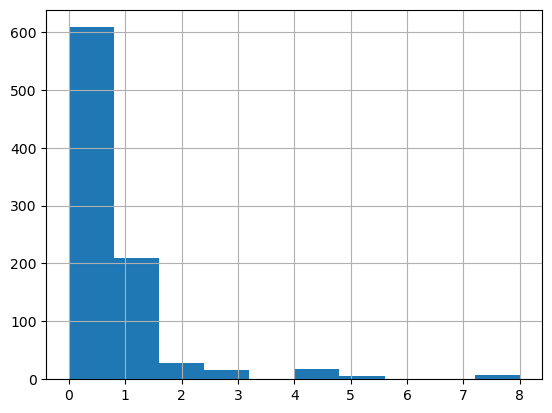

In [47]:
df.sibsp.hist()

<AxesSubplot:>

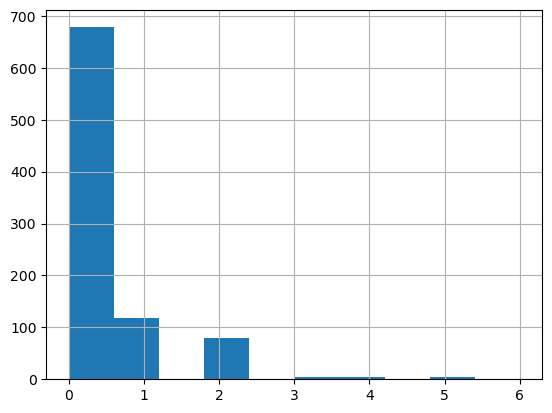

In [48]:
df.parch.hist()

There are a few outliers potentially in sibsp, parch, but without specific domain knowledge related to the titanic, I am not going to remove those outliers or snap them/compress them, I will ignore them for now.

### For Modeling: Make all columns numeric (encode)
- machine learning models only work with numeric values

#### Therefore, we have to Encode!

- Encoding -- turning a string into a number


Two strategies:
- label encoding -- associate each unique value with a number
    - use the label encoder when the categories have an inherit order
- one-hot encoding (get_dummies) -- turn each unique value into a separate column with either 1 or 0
    - use one-hot encoding when there is no order 

*Note: Curse of dimensionality*
- An increase in the dimensions can, in theory, add more information to the data thereby improving the quality of data but practically increases the noise and redundancy during its analysis
- An increase in dimensionality it implies an increase in the number of features

also known as Hughes phenomenon: https://miro.medium.com/v2/resize:fit:1400/format:webp/1*pcJdd2y924Xk61SXa7uYpw.jpeg

#### one-hot encoding
- `pd.get_dummies`
- get dummy vars for both sex and embark_town columns

In [49]:
df.sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [50]:
#look at sex data
df.sex.head()

0      male
1    female
2    female
3    female
4      male
Name: sex, dtype: object

In [51]:
#use get_dummies on sex data
pd.get_dummies(df.sex).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [52]:
#drop first column
pd.get_dummies(df.sex, drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [55]:
# create dummy variables for 'sex' and 'embark_town'
pd.get_dummies(df[['sex', 'embarked']]).head()

,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


### Embarked

In [57]:
pd.get_dummies(df[['embarked']], drop_first=True).head()

,embarked_Q,embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [59]:
pd.get_dummies(df[['embarked']], drop_first=True).sample(10)

,embarked_Q,embarked_S
854,0,1
586,0,1
814,0,1
223,0,1
503,0,1
7,0,1
50,0,1
825,1,0
382,0,1
806,0,1


In [60]:
pd.get_dummies(df[['embarked']]). drop_duplicates()

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
5,0,1,0


In [61]:
pd.get_dummies(df[['embarked']], drop_first=True).drop_duplicates()

,embarked_Q,embarked_S
0,0,1
1,0,0
5,1,0


In [62]:
dummy_df = pd.get_dummies(df[['sex','embarked']], drop_first=True)
dummy_df.head()

,sex_male,embarked_Q,embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [63]:
# concatenate the dummy_df dataframe above with the original df and validate.
df = pd.concat([df, dummy_df], axis=1)

> i will keep my string values in my dataframe for now. as i will need them for exploration. 

In [64]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


### Now that everything is clean, lets make a function!

In [65]:
def clean_titanic(df):
    '''
    This function will clean the the titanic dataset
    '''
    df = df.drop(columns =['embark_town','class','age','deck'])

    df.embarked = df.embarked.fillna(value='S')

    dummy_df = pd.get_dummies(df[['sex','embarked']], drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    return df

Testing that the function does what we intend for it to do:

In [66]:
#acquire fresh copy of titanic function
fresh_df = acquire.get_titanic_data()

csv file found and loaded


In [67]:
fresh_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [68]:
#use clean function
clean_titanic(fresh_df)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,S,1,1,0,1
887,887,1,1,female,0,0,30.0000,S,1,0,0,1
888,888,0,3,female,1,2,23.4500,S,0,0,0,1
889,889,1,1,male,0,0,30.0000,C,1,1,0,0


# Step 3: Splitting

- Start with single dataframe
- End with three dataframes: train, validate, test
    - **train:** data to explore, and fit 
    - **validate, test:** represents unseen data
        - **validate:** confirm our top models have not overfit, and tune our hyperparameters
        - **test:** test our top model -- ONLY USED ON 1 MODEL!

To accomplish this
- do two splits using sklean 
- train dataset should be the bulk of the dataframe ~60%
- validate should be about ~20%
- test should be about ~20%

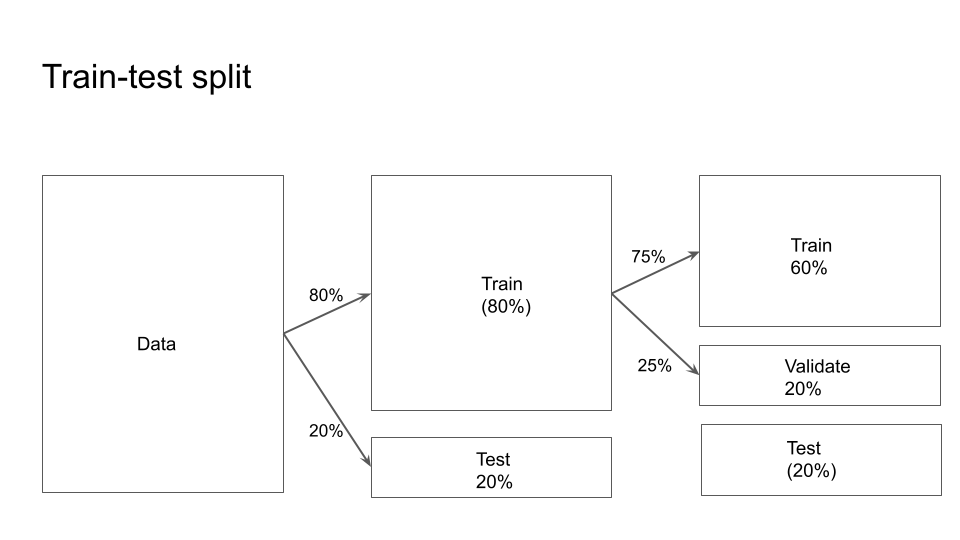

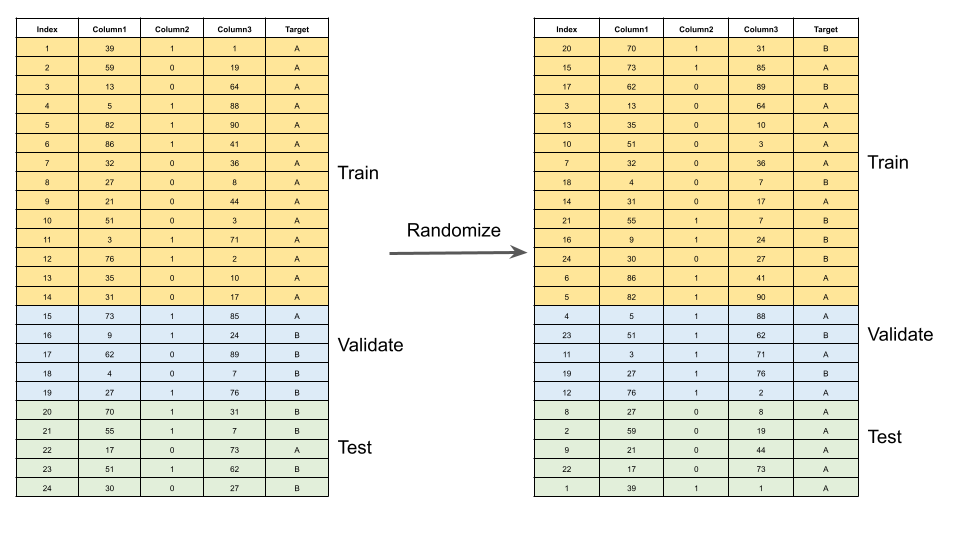

Our target variable contains A and B. Notice how many B values made it into the train dataset. 

Let's correct this by stratifing on our target variable.

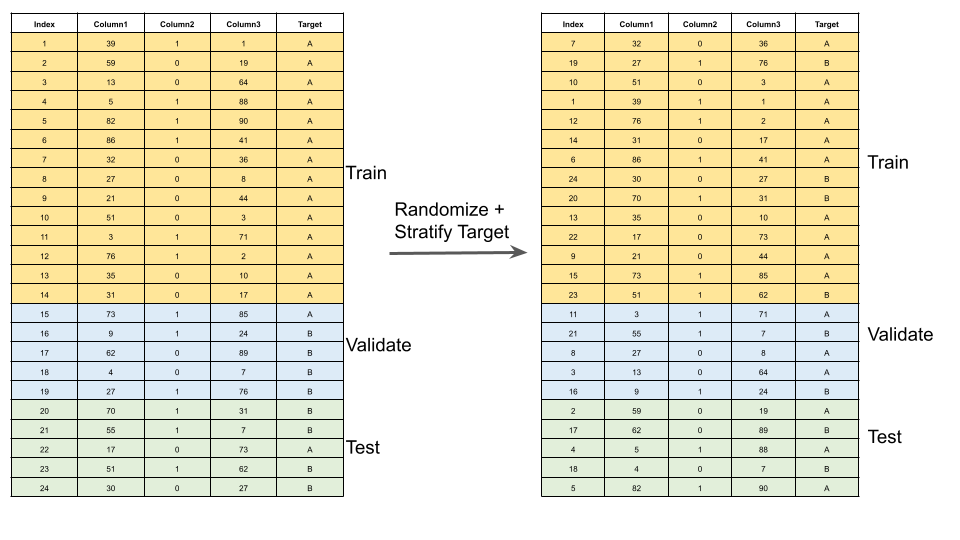

Sklearn allows us to split our data easily:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [73]:
# import splitting functions
from sklearn.model_selection import train_test_split

In [74]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1
3,3,1,1,female,1,0,53.1000,S,0,0,0,1
4,4,0,3,male,0,0,8.0500,S,1,1,0,1


In [78]:
#first split
train, test = train_test_split(df,# dataframe
                random_state=123, # setting my random seed 
                test_size=0.20, # setting the size of my test df
                stratify=df.survived # stratifying on my target variable
                )

In [79]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Test: {test.shape}')

Prepared df: (891, 12)

Train: (712, 12)
Test: (179, 12)


In [80]:
len(train) / len(df)

0.7991021324354658

In [81]:
len(test) / len(df)

0.20089786756453423

In [82]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
222,222,0,3,male,0,0,8.0500,S,1,1,0,1
610,610,0,3,female,1,5,31.2750,S,0,0,0,1
249,249,0,2,male,1,0,26.0000,S,0,1,0,1
814,814,0,3,male,0,0,8.0500,S,1,1,0,1
118,118,0,1,male,0,1,247.5208,C,0,1,0,0


In [83]:
test.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
561,561,0,3,male,0,0,7.8958,S,1,1,0,1
641,641,1,1,female,0,0,69.3000,C,1,0,0,0
400,400,1,3,male,0,0,7.9250,S,1,1,0,1
498,498,0,1,female,1,2,151.5500,S,0,0,0,1
875,875,1,3,female,0,0,7.2250,C,1,0,0,0


Note: this is our first split. there is only train and test. we still need our second split for validate. 

In [84]:
#second split
train, validate = train_test_split(train,
                random_state=123,
                test_size=0.25,
                stratify=train.survived
                )

In [85]:
# Observe split
print(f'Prepared df: {df.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Prepared df: (891, 12)

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


- Train is now 60% of our data
- Validate is now 20% of our data
- Test is now 20% of our data

### Turn it into a function

In [86]:
# This will only work on survived
def split_titanic(df): 
    '''
    Takes in the titanic dataframe and return train, validate, test subset dataframes
    '''
    train, test = train_test_split(df, #first split
                                   test_size=.2, 
                                   random_state=123, 
                                   stratify=df.survived) 
    train, validate = train_test_split(train, # second split
                                       test_size=.25, 
                                       random_state=123, 
                                       stratify=train.survived)
    return train, validate, test

Test our new function!

In [87]:
train, validate, test= split_titanic(df)

In [88]:
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (534, 12)
Validate: (178, 12)
Test: (179, 12)


### We can create a function made of both of our prepare functions!

In [89]:
# Another function? YES PLZ!
def prep_titanic_data(df):
    '''
    The ultimate dishwasher - clean data and split my titanic
    '''
    df = clean_titanic(df)
    train, validate, test = split_titanic(df)
    
    return train, validate, test

In [90]:
# Run final prepare function and validate what that the function is working properly.
fresh_df = acquire.get_titanic_data()

csv file found and loaded


In [91]:
print(f'Clean df: {df_fresh.shape}')
print()
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

NameError: name 'df_fresh' is not defined

In [92]:
train, validate, test=prep_titanic_data(fresh_df)

In [93]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
455,455,1,3,male,0,0,7.8958,C,1,1,0,0
380,380,1,1,female,0,0,227.5250,C,1,0,0,0
492,492,0,1,male,0,0,30.5000,S,1,1,0,1
55,55,1,1,male,0,0,35.5000,S,1,1,0,1
243,243,0,3,male,0,0,7.1250,S,1,1,0,1


All three functions that we created can be will be added to a .py file!
- clean_titanic
- split_titanic
- prep_titanic

We end our prepare phase with a prepare.py with all our functions

## Option for Missing Values: Impute


Impute: Assign a value to something by inference


Strategies for imputing:
- fill with 0
- fill with the average
- fill with the median
- fill with subgroup mean
- fill with most frequent value
- build a model to predict missing values



We will use `sklearn.imputer.SimpleImputer` to do this.  

0. Split data into train/validate/test
1. Create the imputer object
    - use determined strategy for impyting
2. Fit to train 
    - used determined strategy to calculated imputed value
    - updates imputer object
3. Transform train/validate/test
    - fill missing values with imputed value on our train, validate, and test df

### lets revisit our initial titanic dataset & fill in the nulls from embark_town

In [94]:
#get fresh titanic data
df_fresh = acquire.get_titanic_data()

csv file found and loaded


In [95]:
#look at nulls of embark_town
df_fresh.embark_town.isnull().sum()

2

#### Step 0. Split data into train/validate/test

In [96]:
#split the data
train, validate, test = split_titanic(df_fresh)

In [97]:
print('embark_town nulls\n')
print(f'train nulls: {train.embark_town.isnull().sum()}')
print(f'validate nulls: {validate.embark_town.isnull().sum()}')
print(f'test nulls: {test.embark_town.isnull().sum()}')

embark_town nulls

train nulls: 1
validate nulls: 1
test nulls: 0


#### Step 1. Create the imputer object

Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, `imputer`.

In [98]:
# import imputing functions
from sklearn.impute import SimpleImputer

In [99]:
# SimpleImputer?

In [100]:
# Define the thing using (strategy = 'most_frequent')
imputer = SimpleImputer(strategy = 'most_frequent')
imputer

SimpleImputer(strategy='most_frequent')

#### Step 2. Fit to train 

This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column, in the training set only

In [101]:
# fit the thing using imputer.fit()
imputer.fit(train[['embarked']])

SimpleImputer(strategy='most_frequent')

It will store that value in the imputer object. We can call different attributes to see what is stored in the importer. 

In [102]:
imputer.feature_names_in_

array(['embarked'], dtype=object)

In [103]:
imputer.statistics_

array(['S'], dtype=object)

#### Step 3. Transform train/validate/test

Use our imputer object to `transform`. We will call `transform` on our train, validate, and test datasets to fill any missing values.

In [104]:
# Use the thing using imputer.transform()
train[['embarked']] = imputer.transform(train[['embarked']])
validate[['embarked']] = imputer.transform(validate[['embarked']])
test[['embarked']] = imputer.transform(test[['embarked']])

In [105]:
# Validate that there are no longer any Null values in embarked.
print('embarked nulls\n')
print(f'train nulls: {train.embarked.isnull().sum()}')
print(f'validate nulls: {validate.embarked.isnull().sum()}')
print(f'test nulls: {test.embarked.isnull().sum()}')

embarked nulls

train nulls: 0
validate nulls: 0
test nulls: 0
